In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.compose import ColumnTransformer

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAKSHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAKSHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAKSHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
df1 = pd.read_csv("Reddit_Data.csv")
df1.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
df2 = pd.read_csv("Twitter_Data.csv")
df2.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [24]:
df1 = df1.rename(columns={'clean_comment': 'clean_text'})

In [25]:
print(df1.shape)
df2.shape

(37249, 2)


(162980, 2)

In [26]:
df3 = pd.concat([df1,df2] , ignore_index = True)

In [27]:
df3 = df3.dropna()

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200118 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  200118 non-null  object 
 1   category    200118 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB


In [29]:
df3["length"] = df3.clean_text.str.len()

In [30]:
df3.head()

,clean_text,category,length
0,family mormon have never tried explain them t...,1.0,261
1,buddhism has very much lot compatible with chr...,1.0,1269
2,seriously don say thing first all they won get...,-1.0,460
3,what you have learned yours and only yours wha...,0.0,168
4,for your own benefit you may want read living ...,1.0,691


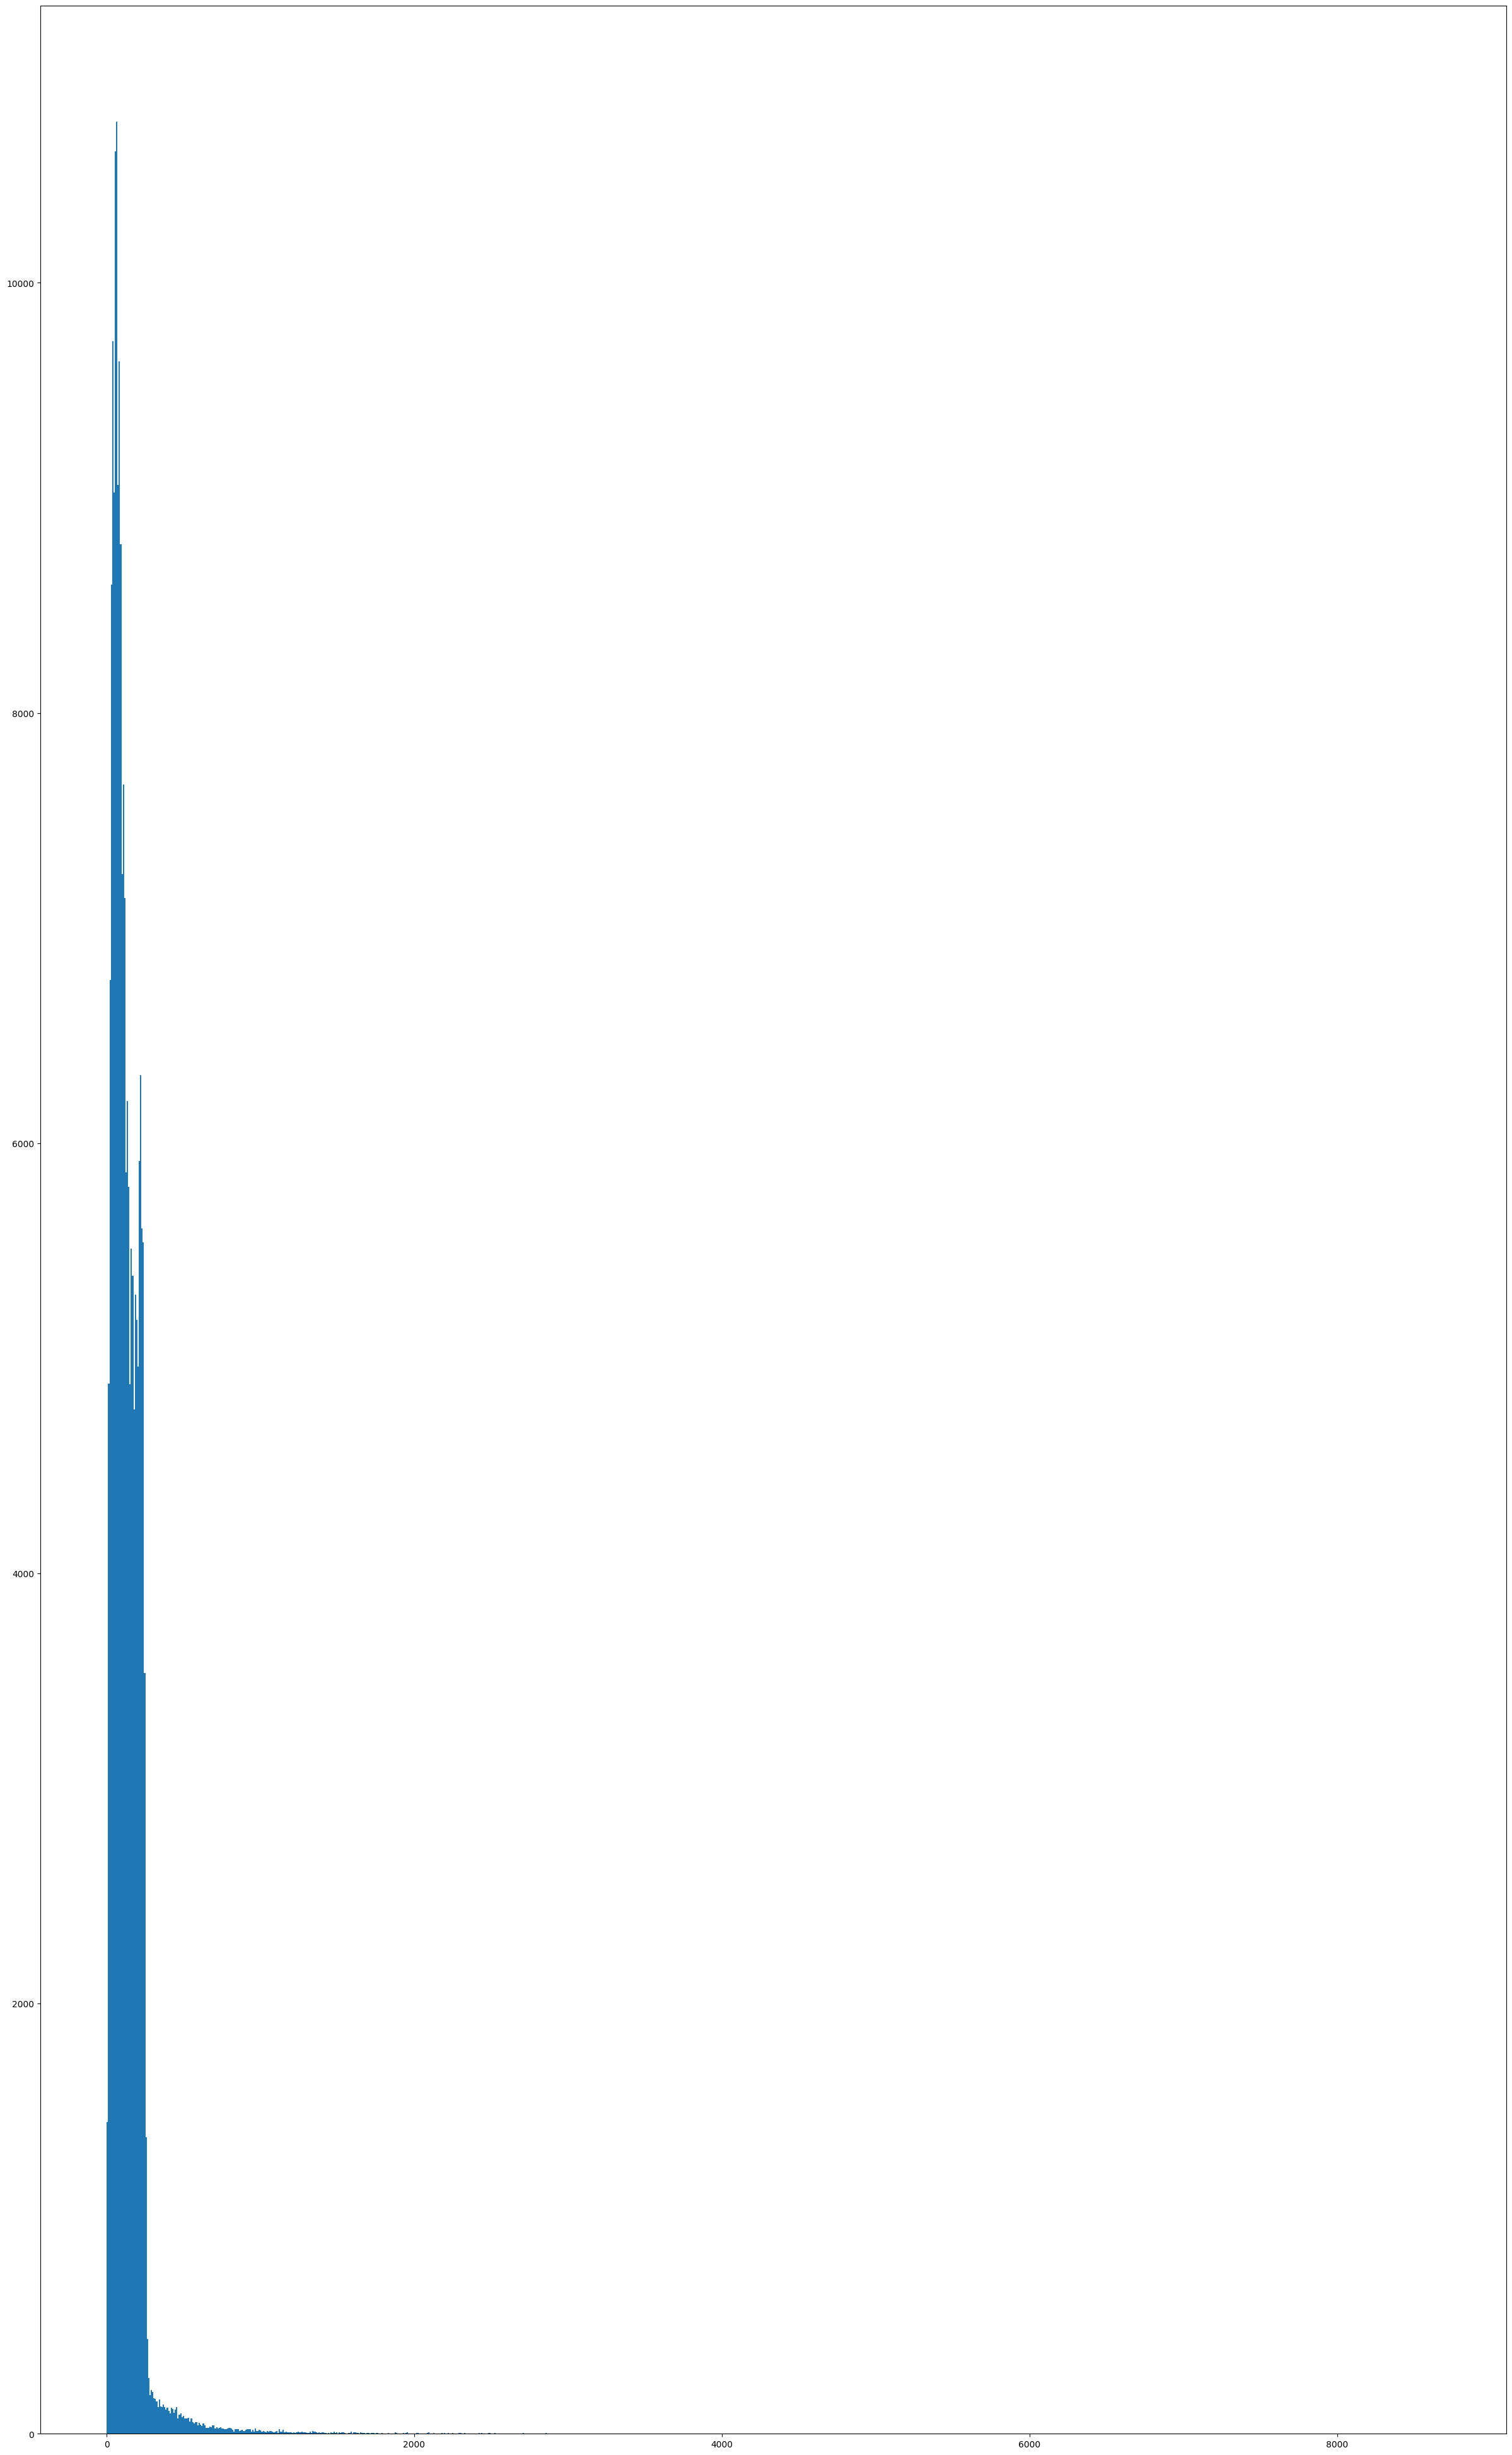

In [113]:
plt.figure(figsize = (30 , 50))
plt.hist(df3["length"] ,bins= 1000)
plt.show()

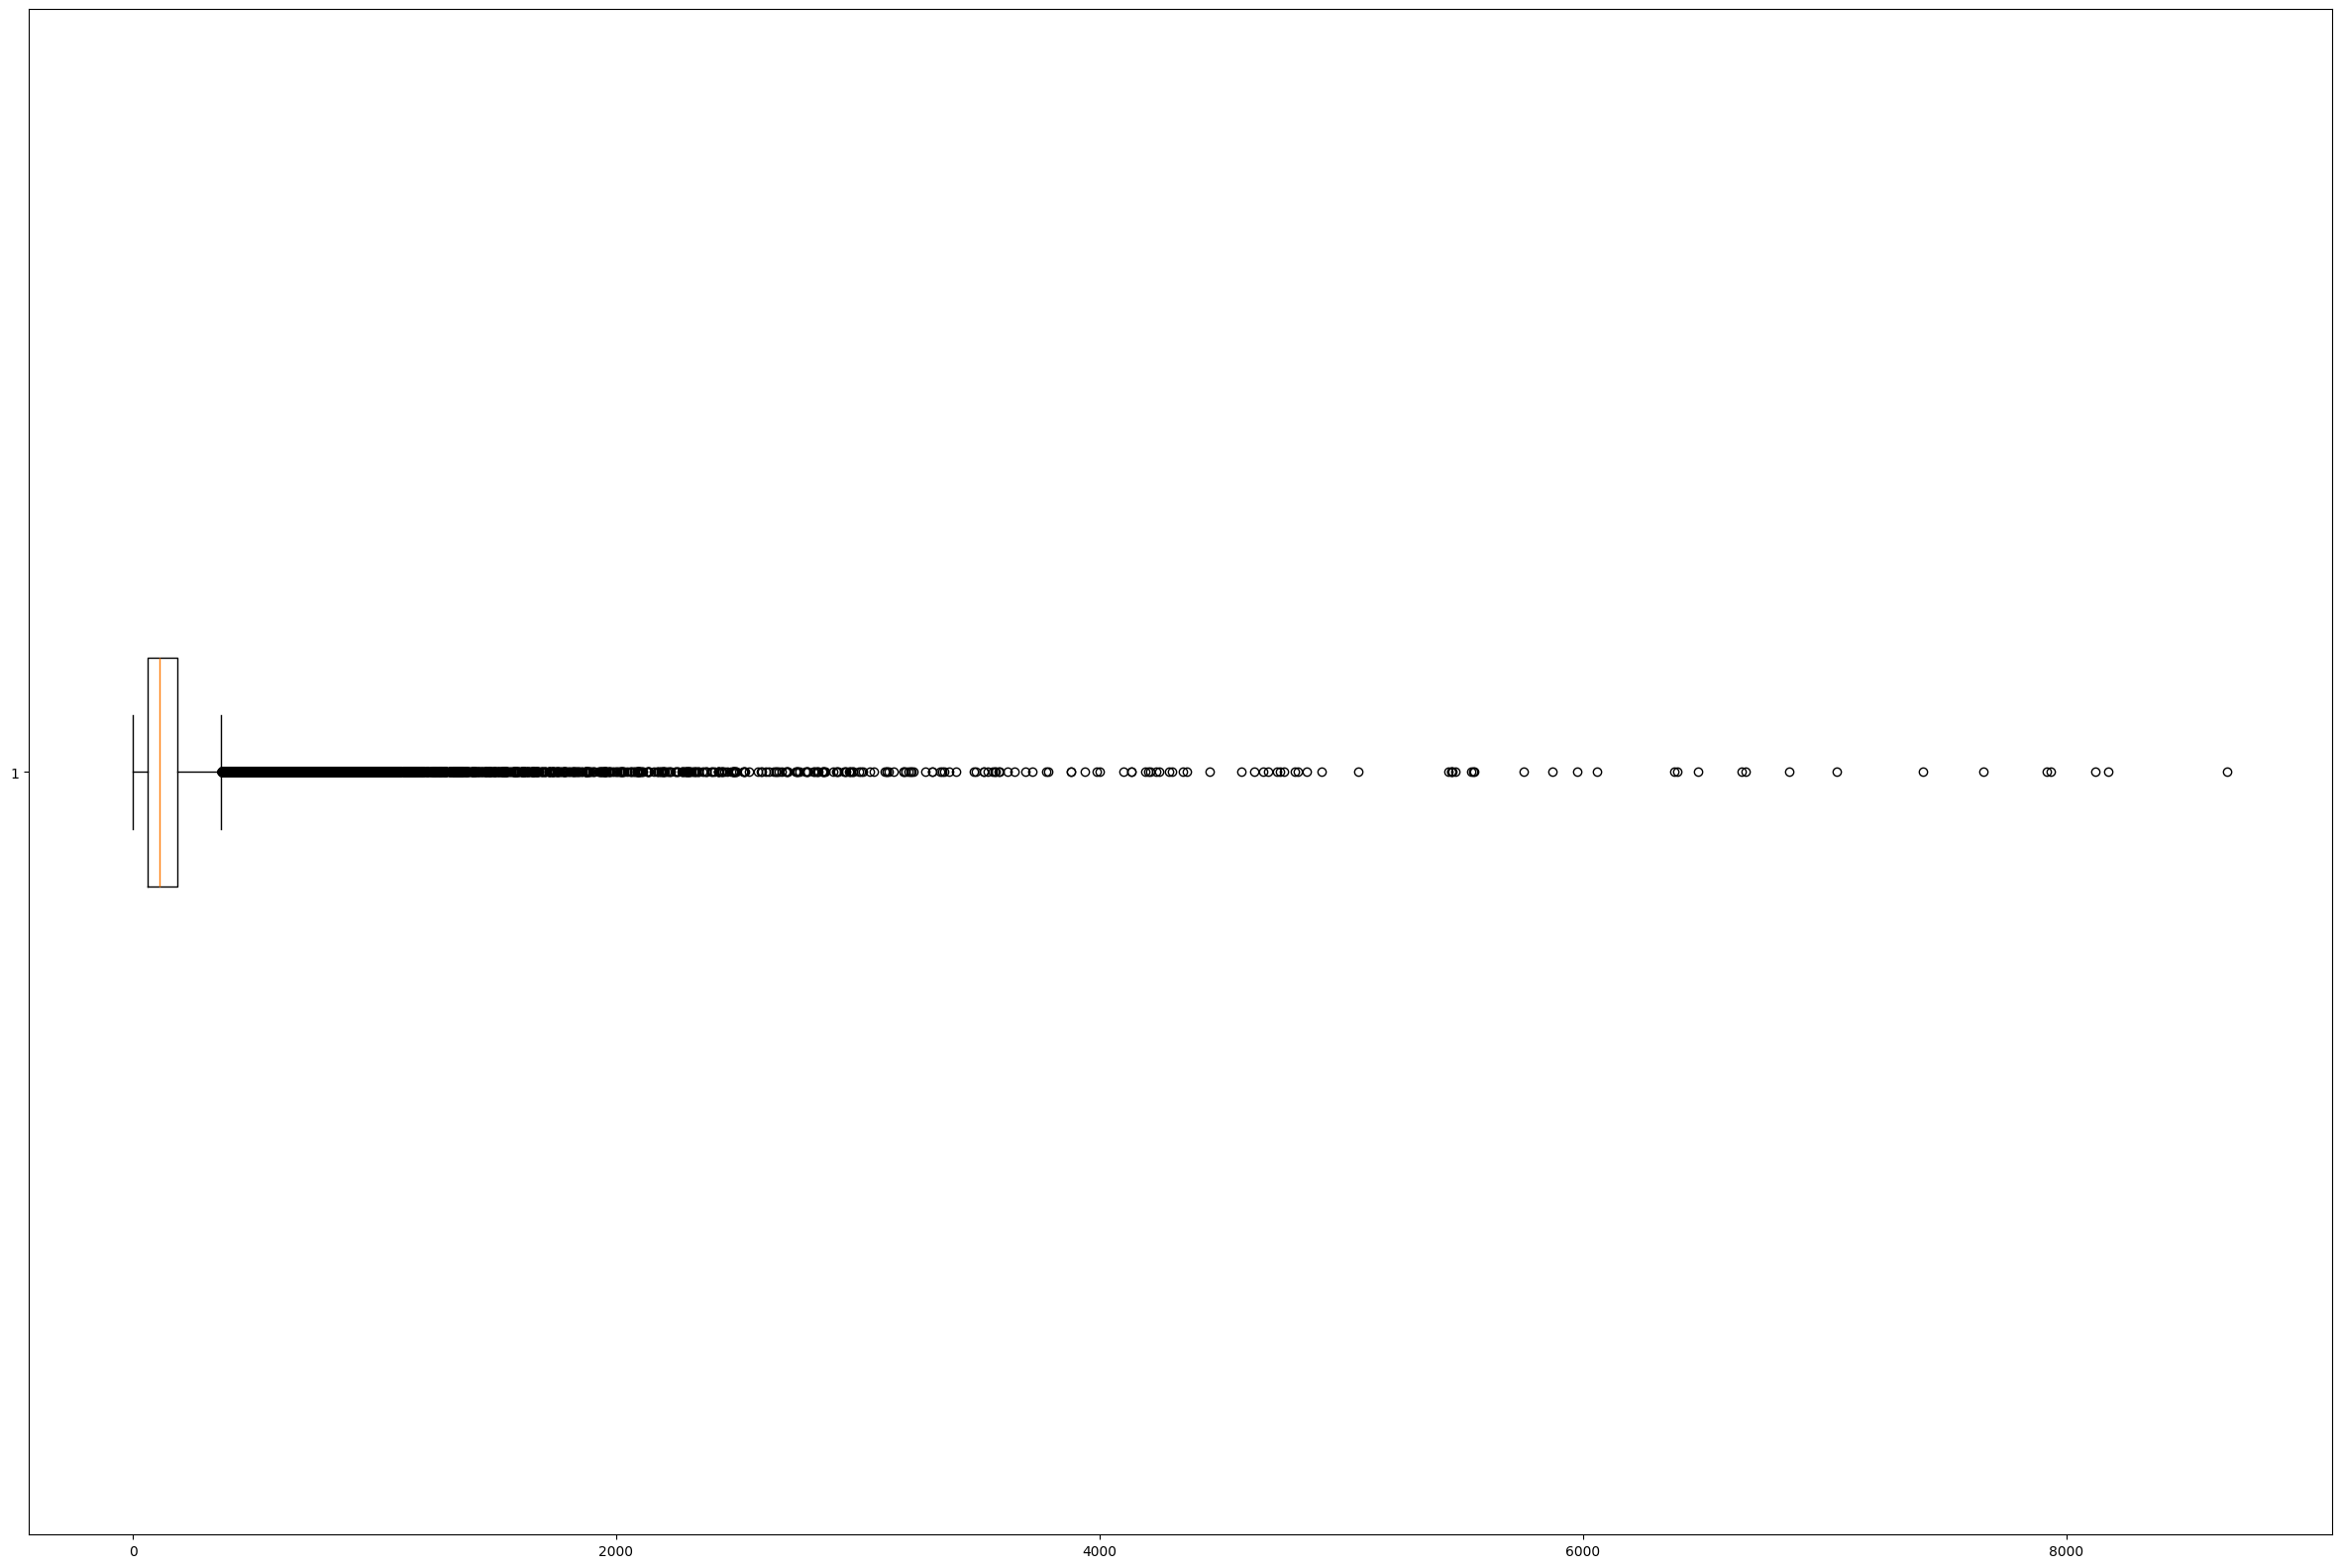

In [114]:
plt.figure(figsize = (30 , 20))
plt.boxplot(df3["length"] , vert = False)
plt.show()

In [31]:
df3['category'] = df3['category'].replace({-1.0 : "Negative" ,0.0 : "Neutral", 1.0 : "Positive"})

([<matplotlib.patches.Wedge at 0x17c36c1e870>,
 [Text(0.20566004431891907, 1.0806035101602902, 'Positive'),
  Text(-0.8446176784778795, -0.7047134007542623, 'Neutral'),
  Text(0.8501998942730495, -0.6979685807957945, 'Negative')],
 [Text(0.11217820599213767, 0.5894200964510673, '44.0%'),
  Text(-0.46070055189702513, -0.384389127684143, '34.1%'),
  Text(0.4637453968762088, -0.3807101349795243, '21.9%')])

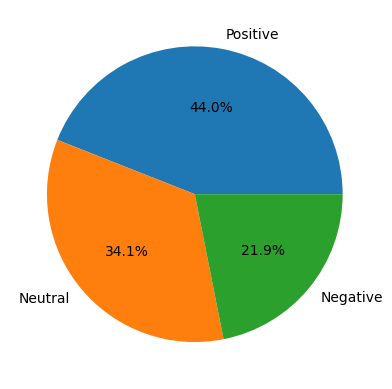

In [32]:
plt.pie(df3["category"].value_counts() ,labels = ["Positive" ,"Neutral", "Negative"] , autopct = "%1.1f%%")

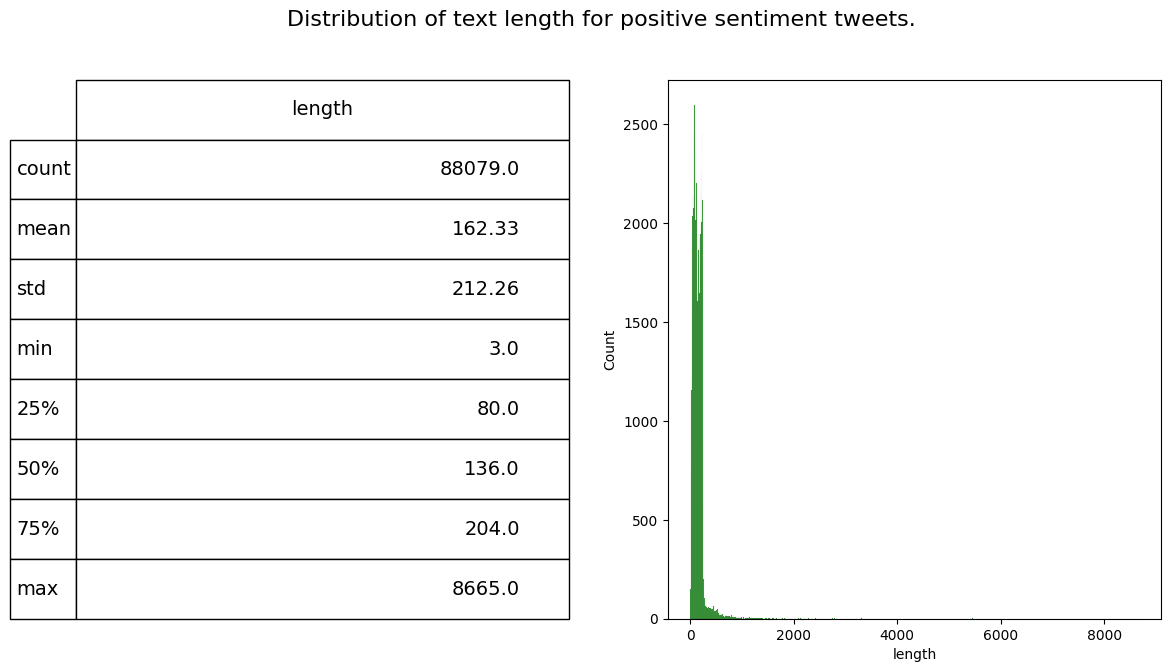

In [33]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(df3[df3['category']=='Positive']['length'], ax=ax1,color='green')
describe = df3.length[df3.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

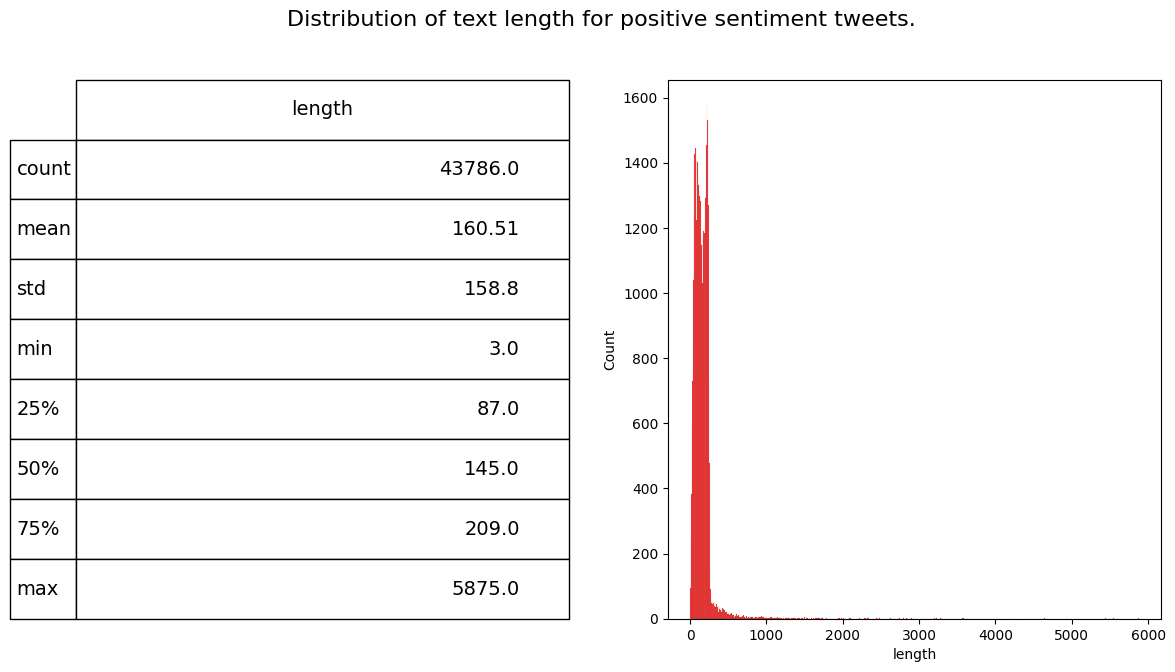

In [119]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(df3[df3['category']=='Negative']['length'], ax=ax1,color='Red')
describe = df3.length[df3.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

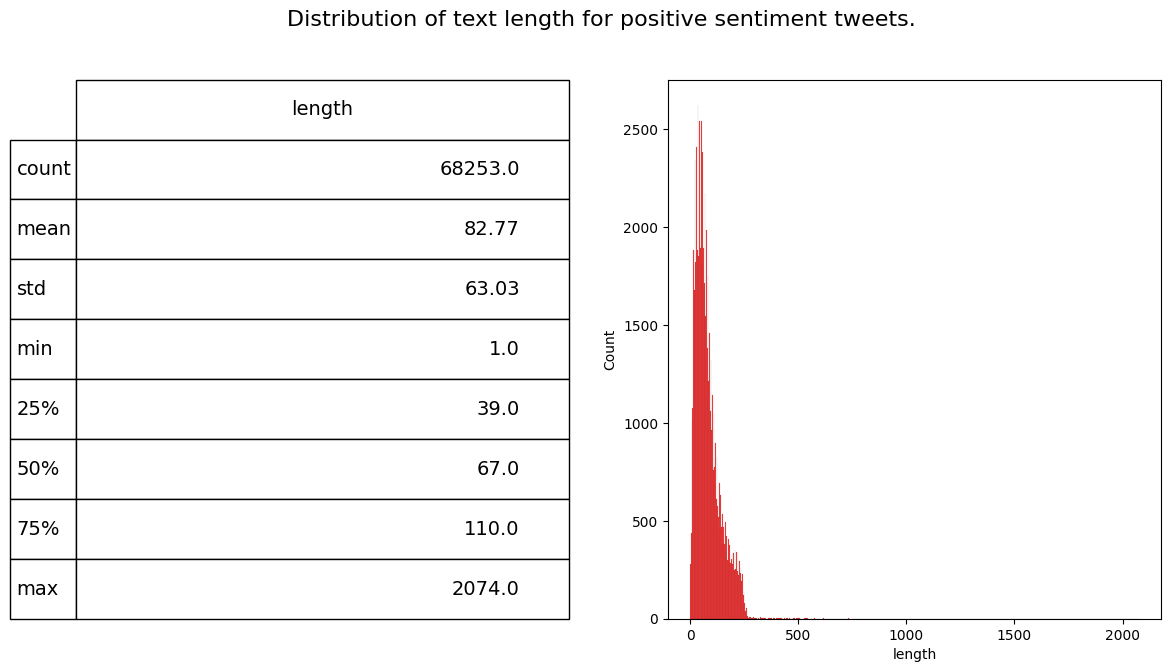

In [120]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(df3[df3['category']=='Neutral']['length'], ax=ax1,color='Red')
describe = df3.length[df3.category=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

In [156]:
df3['category'].value_counts()

category
Positive    88079
Neutral     68253
Negative    43786
Name: count, dtype: int64

In [182]:
df4 = df3[ (df3["category"] != 'Neutral') | ((df3["length"] <= 90) & (df3['category'] == 'Neutral')) ]
df4['category'].value_counts()

category
Positive    88079
Neutral     45239
Negative    43786
Name: count, dtype: int64

In [185]:
df4 = df4[ (df4["category"] != 'Positive') | ((df4["length"] <= 130) & (df4['category'] == 'Positive')) ]
df4['category'].value_counts()

category
Neutral     45239
Negative    43786
Positive    42011
Name: count, dtype: int64

In [146]:
df4.shape

(92449, 3)

In [200]:
df5 = df3[df3["length"] >= 80]

In [194]:
df5 = df4[df4["length"] >= 30]

In [202]:
df5 = df4[df4["length"] <= 500]

In [203]:
df5.reset_index(drop=True)

,clean_text,category,length
0,seriously don say thing first all they won get...,Negative,460
1,you should all sit down together and watch the...,Negative,146
2,jesus was zen meets jew,Neutral,24
3,unto others you would have them unto you woul...,Positive,59
4,does evil include the lady pai chunked,Negative,39
...,...,...,...
130339,engine growth modi unveils indias first 12000 ...,Positive,72
130340,why these 456 crores paid neerav modi not reco...,Negative,108
130341,dear rss terrorist payal gawar what about modi...,Negative,248
130342,did you cover her interaction forum where she ...,Neutral,51


In [204]:
df5['category'].value_counts()

category
Neutral     45239
Negative    43094
Positive    42011
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x16e6ed2d040>,
 [Text(0.5083781225885968, 0.9754751070495309, 'Negative'),
  Text(-1.096672425045671, -0.08549615280495022, 'Neutral'),
  Text(0.5826578521355762, -0.9330111614256054, 'Positive')],
 [Text(0.27729715777559827, 0.5320773311179259, '34.7%'),
  Text(-0.5981849591158205, -0.04663426516633648, '33.1%'),
  Text(0.31781337389213243, -0.5089151789594211, '32.2%')])

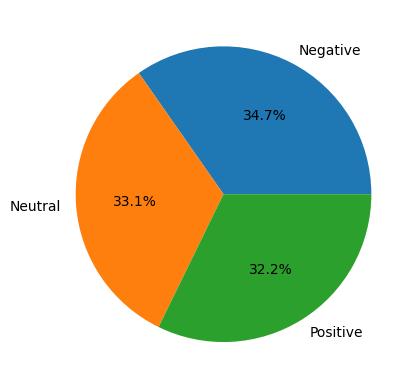

In [205]:
plt.pie(df5["category"].value_counts() ,labels = df5['category'].unique() , autopct = "%1.1f%%")

In [88]:
df3 = df3[df3["length"] <= 300]

In [ ]:
df3

,clean_text,category,length
0,family mormon have never tried explain them t...,Positive,261
3,what you have learned yours and only yours wha...,Neutral,168
5,you should all sit down together and watch the...,Negative,146
7,jesus was zen meets jew,Neutral,24
9,dont worry about trying explain yourself just ...,Positive,193
...,...,...,...
200224,why these 456 crores paid neerav modi not reco...,Negative,108
200225,dear rss terrorist payal gawar what about modi...,Negative,248
200226,did you cover her interaction forum where she ...,Neutral,51
200227,there big project came into india modi dream p...,Neutral,77


In [ ]:
df3 = df3.reset_index(drop = False)

([<matplotlib.patches.Wedge at 0x7afc51d10a00>,
 [Text(0.22831156159581653, 1.076045459467991, 'Positive'),
  Text(-0.8553154878459472, -0.6916902603411802, 'Neutral'),
  Text(0.8541532533505044, -0.6931249669365181, 'Negative')],
 [Text(0.12453357905226355, 0.5869338869825405, '43.3%'),
  Text(-0.4665357206432439, -0.3772855965497346, '35.0%'),
  Text(0.4659017745548205, -0.3780681637835553, '21.7%')])

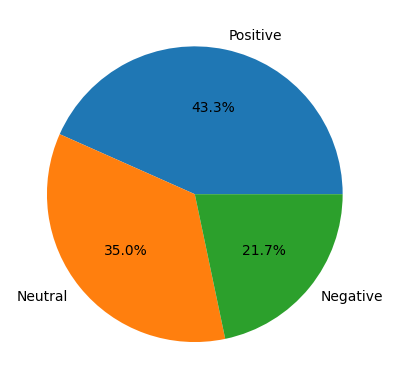

In [ ]:
plt.pie(df3["category"].value_counts(), labels=["Positive", "Neutral", "Negative"], autopct="%1.1f%%")

In [21]:
from wordcloud import WordCloud, STOPWORDS

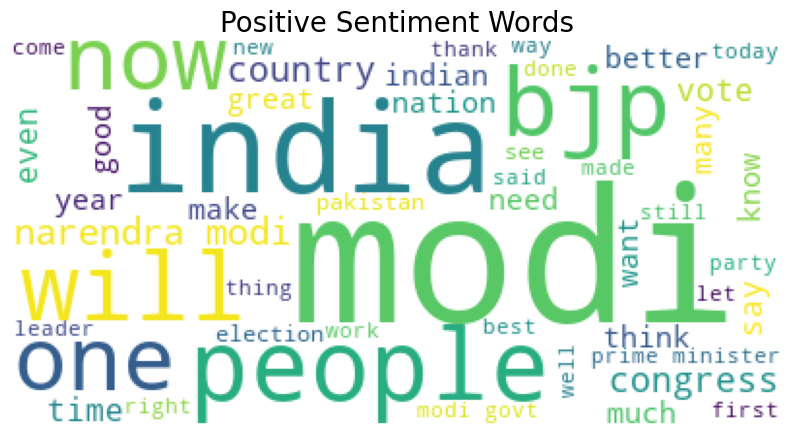

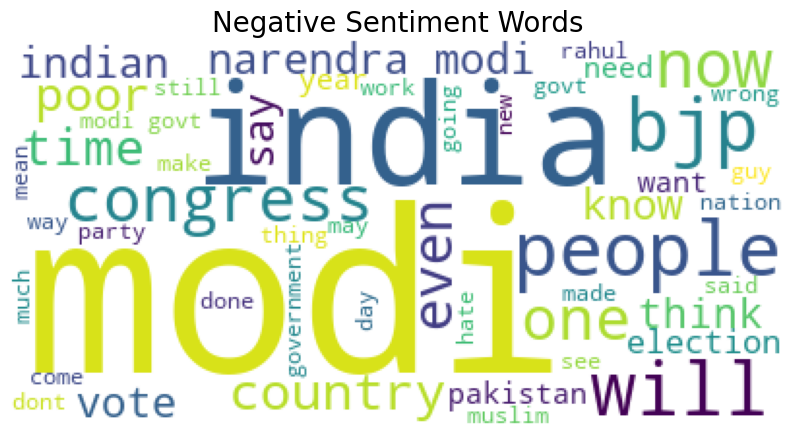

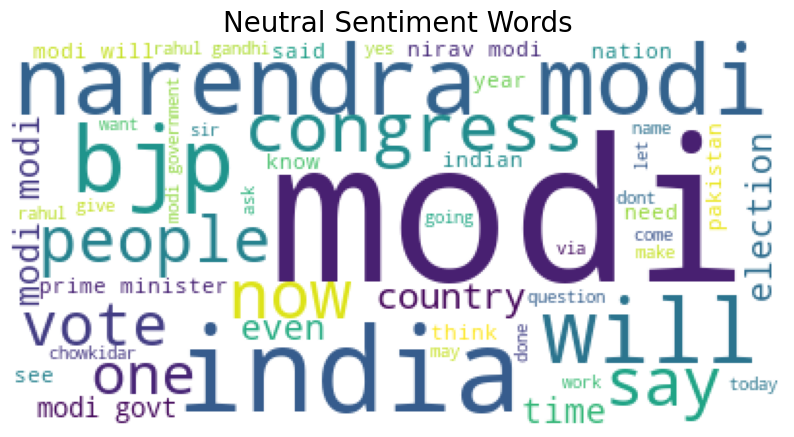

In [206]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df3[df3.category==category]['clean_text']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

# Positive tweet words
wordcount_gen(df5, 'Positive')

# Negative tweet words
wordcount_gen(df5, 'Negative')

# Neutral tweet words
wordcount_gen(df5, 'Neutral')

In [208]:
def tweet_to_words(tweet):

    # convert to lowercase
    text = tweet.lower()
    text = text.strip()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply lemmatizing
    words = " ".join([lemmatizer.lemmatize(word, pos='v') for word in words])
    # return list
    return words

print("\nOriginal tweet ->", df5['clean_text'][2])
print("\nProcessed tweet ->", tweet_to_words(df5['clean_text'][2]))


Original tweet -> seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg 

Processed tweet -> seriously say thing first get complex explain normal people anyway dogmatic matter say see mechante post reason decide later life move buddhism suit identity though still get keep wisdom family treat like go weird hippy phase didncha never hear end pro tip put one wall jpg


In [ ]:
def vector(text):
  vectorizer = CountVectorizer()
  return vectorizer.transform(text)

In [233]:
X = df5["clean_text"]
Y = df5["category"]
x_train , x_test , y_train , y_test = train_test_split(X , Y, test_size = 0.25 , random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(97502,) (32501,) (97502,) (32501,)


In [234]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [235]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(x_train)
X_test_vec = vectorizer.transform(x_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example inference
test_sentence = "This tweet contains hate speech."
test_sentence_vec = vectorizer.transform([test_sentence])
prediction = nb_classifier.predict(test_sentence_vec)[0]
print("Predicted label:", prediction)

Accuracy: 0.7277006861327344
Classification Report:
              precision    recall  f1-score   support

    Negative       0.63      0.89      0.74     10862
     Neutral       0.88      0.57      0.69     11154
    Positive       0.77      0.72      0.74     10485

    accuracy                           0.73     32501
   macro avg       0.76      0.73      0.73     32501
weighted avg       0.76      0.73      0.72     32501

Predicted label: Negative


In [236]:
nb_classifier.predict(vectorizer.transform(["slut"]))

array(['Negative'], dtype='<U8')

In [218]:
df5[df5["length"]<=5]

,clean_text,category,length
181,,Neutral,1
375,,Neutral,1
392,,Neutral,1
563,want,Neutral,5
604,cut,Neutral,5
...,...,...,...
184768,spot,Neutral,5
189793,dis,Neutral,4
194307,yeah,Neutral,5
194699,pimp,Neutral,5


In [210]:
df5["clean_text"] = df5["clean_text"].apply(tweet_to_words)

In [224]:
df5 = df5.reset_index(drop= True)

In [230]:
df5['length'] = df5['clean_text'].apply(len)

In [231]:
df5 = df5[df5['length'] > 0]

In [232]:
df5['category'].value_counts()

category
Neutral     44907
Negative    43091
Positive    42005
Name: count, dtype: int64

In [ ]:
df4["length"] = df4["clean_text"].apply(len)

In [ ]:
df4.drop(df4[df4["length"] <= 1].index , inplace = True)

In [ ]:
df4.drop("index", axis = 1)

,clean_text,category,length
0,family mormon never try explain still stare pu...,Positive,192
1,learn want teach different focus goal wrap pap...,Neutral,89
2,sit together watch simpsons episode lisa becom...,Negative,101
3,jesus zen meet jew,Neutral,18
4,dont worry try explain meditate regularly try ...,Positive,123
...,...,...,...
194643,456 crores pay neerav modi recover congress le...,Negative,78
194644,dear rss terrorist payal gawar modi kill 1000 ...,Negative,222
194645,cover interaction forum leave,Neutral,29
194646,big project come india modi dream project happ...,Neutral,56


In [ ]:
df4.reset_index(drop = True)

,index,clean_text,category,length
0,0,family mormon never try explain still stare pu...,Positive,192
1,3,learn want teach different focus goal wrap pap...,Neutral,89
2,5,sit together watch simpsons episode lisa becom...,Negative,101
3,7,jesus zen meet jew,Neutral,18
4,9,dont worry try explain meditate regularly try ...,Positive,123
...,...,...,...,...
194294,200224,456 crores pay neerav modi recover congress le...,Negative,78
194295,200225,dear rss terrorist payal gawar modi kill 1000 ...,Negative,222
194296,200226,cover interaction forum leave,Neutral,29
194297,200227,big project come india modi dream project happ...,Neutral,56


In [ ]:
df4

,index,clean_text,category,length
0,0,family mormon never try explain still stare pu...,Positive,192
1,3,learn want teach different focus goal wrap pap...,Neutral,89
2,5,sit together watch simpsons episode lisa becom...,Negative,101
3,7,jesus zen meet jew,Neutral,18
4,9,dont worry try explain meditate regularly try ...,Positive,123
...,...,...,...,...
194643,200224,456 crores pay neerav modi recover congress le...,Negative,78
194644,200225,dear rss terrorist payal gawar modi kill 1000 ...,Negative,222
194645,200226,cover interaction forum leave,Neutral,29
194646,200227,big project come india modi dream project happ...,Neutral,56


In [ ]:
df4.to_csv('sentimental.csv', index=False)

In [22]:
def tweet_to_words(tweet):
    # Check if the input is a Pandas Series
    if isinstance(tweet, pd.Series):
        # Apply the function element-wise for each tweet in the Series
        processed_tweets = tweet.apply(tweet_to_words)
        return processed_tweets

    # Convert to lowercase
    text = tweet.lower()

    # Remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)

    # Tokenize
    words = text.split()

    # Remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]

    # Apply lemmatizing
    words = " ".join([lemmatizer.lemmatize(word, pos='v') for word in words])

    # Return processed text
    return words



In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.preprocessing import FunctionTransformer

# Create and fit your pipeline
pipeline = Pipeline([
    ('preprocessing', FunctionTransformer(tweet_to_words)),
    ('vectorization', CountVectorizer())
])

# Fit the pipeline with your data
pipeline.fit(x_train, y_train)

# Save the pipeline to a file
joblib.dump(pipeline, 'sentiment_pipeline.joblib')

# Later, to load the pipeline
loaded_pipeline = joblib.load('sentiment_pipeline.joblib')

In [15]:
df4 = pd.read_csv("sentimental.csv")

In [78]:
pipeline.named_steps

{'preprocessing': FunctionTransformer(func=<function tweet_to_words at 0x7afc433701f0>),
 'vectorization': CountVectorizer()}

In [237]:
import pickle

# Assuming 'model' is your trained model object
with open('sentimental2.pkl', 'wb') as f:
    pickle.dump(nb_classifier, f)

In [238]:
with open('vector2.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [28]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation
    # tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    

    # Join tokens back into a single string
    # preprocessed_text = ' '.join(tokens)

    # Apply preprocessing pipeline
    # preprocessed_text = preprocessing_pipeline.transform([preprocessed_text])

    return tokens

In [29]:
preprocess_text("osdfn")

['osdfn']